# Question 1


Given $\boldsymbol{Y}= \boldsymbol{AX}+\boldsymbol{b}$, where $\boldsymbol A=\begin{bmatrix}a_{11} & a_{12}\\a_{21} & a_{22}\\a_{31} & a_{32}\end{bmatrix}$, $\boldsymbol b=\begin{bmatrix}b_1\\b_2\\b_3\end{bmatrix}$, and $\boldsymbol X=\begin{bmatrix}X_1\\X_2\end{bmatrix}$

## (a) E(Y)=A$\mu$+b

$\text{Proof:}$

$$
\begin{align}
E[\boldsymbol Y] &= E(\boldsymbol{AX}+\boldsymbol b)\\
&=\begin{bmatrix}a_{11}E(X_1)+a_{12}E(X_2)+b_{1}\\a_{21}E(X_1)+a_{22}E(X_2)+b_{2}\\a_{31}E(X_1)+a_{32}E(X_2)+b_{3}\end{bmatrix}\\
&=\boldsymbol AE(\boldsymbol X)+\boldsymbol b\\
&=\boldsymbol A\mu+ \boldsymbol b
\end{align}
$$

## (b) Cov(Y) = $\boldsymbol A\Sigma \boldsymbol A^T$

$\text{Proof:}$

$$
\begin{align}
Cov[\boldsymbol Y] &= Cov(\boldsymbol{AX}+\boldsymbol b)\\
&=E[(\boldsymbol{AX}+\boldsymbol b-\boldsymbol A\mu-\boldsymbol b)(\boldsymbol{AX}+\boldsymbol b-\boldsymbol A\mu-\boldsymbol b)']\\
&=E[\boldsymbol A(\boldsymbol X-\mu)(\boldsymbol X-\mu)'\boldsymbol A']\\
&=\boldsymbol ACov(\boldsymbol X)\boldsymbol A'\\
&=\boldsymbol A\Sigma \boldsymbol A'
\end{align}
$$

# Question 2

## (a)

What is the first principal component? Explain how you reach your answer
carefully and write down its coeﬀicients.

$\text{sol:}$

The first principal component is obtained by

$$\max_{\boldsymbol b_1} \boldsymbol b_1^T\boldsymbol D \boldsymbol b_1\\ s.t. \boldsymbol b_1^T \boldsymbol b_1=1$$

which is equivalent to 

$$\max_{\boldsymbol b_1} 0.855b^2_{11}+0.942b^2_{12}+0.738b^2_{13}+0.109b^2_{14}+2.024b^2_{15}\\s.t. b_{11}^2+...+b_{15}^2=1$$

Hence, in this question we can achieve this by choosing $\boldsymbol b_1=\begin{bmatrix}0\\0\\0\\0\\1\end{bmatrix}$

Notice that $\Sigma = \boldsymbol P\boldsymbol D\boldsymbol P^{-1}$, $\boldsymbol b_i=\boldsymbol P^T\boldsymbol a_i$, and we write $\boldsymbol P=(\boldsymbol e_1,...,\boldsymbol e_5)$, where $\boldsymbol e_i$ are the column vectors of matrix $\boldsymbol P$

Since $\boldsymbol P^T\boldsymbol P=\boldsymbol I$, we have $\begin{bmatrix}\boldsymbol e_1^T\\\boldsymbol e_2^T\\\boldsymbol e_3^T\\\boldsymbol e_4^T\\\boldsymbol e_5^T\end{bmatrix}(\boldsymbol e_1,...,\boldsymbol e_5)= \boldsymbol I$

Thus,

$$\begin{align}
\boldsymbol b_1&=\boldsymbol P^T \boldsymbol a_1
=\begin{bmatrix}\boldsymbol e_1^T\\\boldsymbol e_2^T\\\boldsymbol e_3^T\\\boldsymbol e_4^T\\\boldsymbol e_5^T\end{bmatrix}\boldsymbol a_1
=\begin{bmatrix}0\\0\\0\\0\\1\end{bmatrix}\\
&\implies \boldsymbol a_1=\boldsymbol P\boldsymbol b_1=\boldsymbol e_5  \quad\quad(\text{by the fact that }\boldsymbol P^T\boldsymbol P=\boldsymbol I)\\
&\implies \boldsymbol a_1=\begin{bmatrix}0.006\\0.268\\-0.015\\-0.798\\0.539\end{bmatrix}
\end{align}$$



Therefore, $PC_1$ is $\boldsymbol a_1'\boldsymbol X = 0.006X_1+0.268X_2-0.015X_3-0.798X_4+0.539X_5$


Notice that $Var(\boldsymbol a_1'\boldsymbol X)=\boldsymbol b_1'\boldsymbol D\boldsymbol b_1$ = the corresponding position of the eigenvalue. (Recall: $\boldsymbol b_1' \boldsymbol b_1=1$)

## (b)

Calculate the proportion of variance explained by each component and draw the scree plot.

$\text{sol:}$

The total variance is the sum of the diagonal elements of the covariance matrix $\Sigma$

In fact, $tr(\Sigma)=tr(\boldsymbol P\boldsymbol D\boldsymbol P^T)=tr(\boldsymbol P\boldsymbol P^TD)=tr(\boldsymbol D)=\sum_{i=1}^5\lambda_i=0.855+0.942+0.738+0.109+2.024=4.668$

Hence, the proportion of variance explained by each component is

||$PC_1$|$PC_2$|$PC_3$|$PC_4$|$PC_5$|
|----|---|---|---|---|---|
|$\lambda_i$|2.024|0.942|0.855|0.738|0.109|
|$\lambda_i/tr(\Sigma)$|0.4336|0.2018|0.1832|0.1581|0.0234|


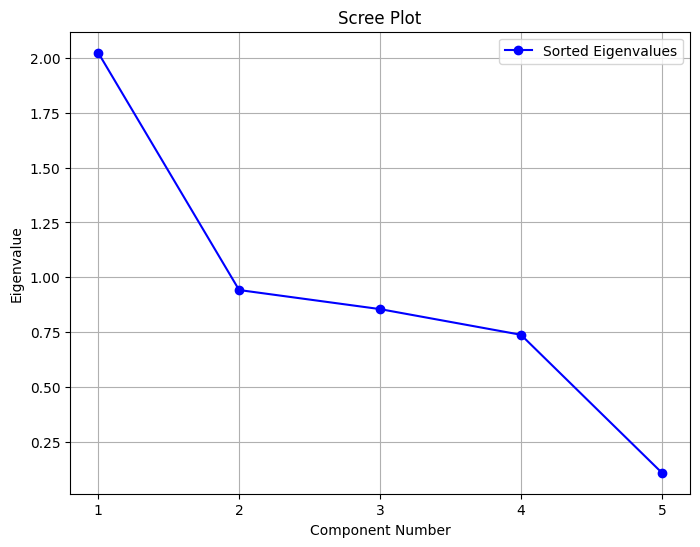

In [1]:
import matplotlib.pyplot as plt

e_vals = [2.024, 0.942, 0.855, 0.738, 0.109]
sorted_e_vals = sorted(e_vals, reverse=True)

# Scree plot
plt.figure(figsize=(8, 6))

plt.plot(range(1, len(sorted_e_vals) + 1), e_vals, marker='o', color='b', label='Sorted Eigenvalues')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot')
plt.xticks(range(1, len(sorted_e_vals) + 1)) 
plt.legend()
plt.grid(True)
plt.show()


# Question 3

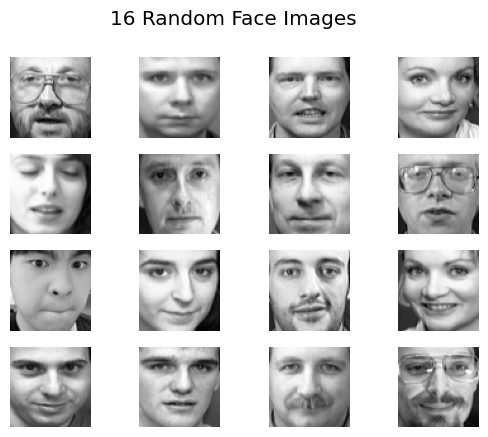

In [12]:
import os
import warnings
from numpy.linalg import matrix_rank
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

np.random.seed(5516)

# Read the faces. The data set is a modified version from the Olivetti data set.add
# For a description for the original data set, 
# see https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html
X = np.loadtxt('faces.csv', delimiter=',') # 401 x 4096  =  obs x features = n x p 

# height, width, and number of images
h, w, n = 64, 64, 401

# Pick 16 random faces to show
val = np.random.choice(n, 16, replace=False)
fig, axs = plt.subplots(4, 4)
fig.suptitle("16 Random Face Images ", fontsize="x-large")
for i in range(16):
    r, c = int(i / 4), i % 4
    axs[r, c].imshow(X[val[i]].reshape(h, w), cmap='gray')
    axs[r, c].axis('off')

## (a) 

Find the principal components, referred to as the ”principal faces”. Plot both the mean face and the first three principal faces.

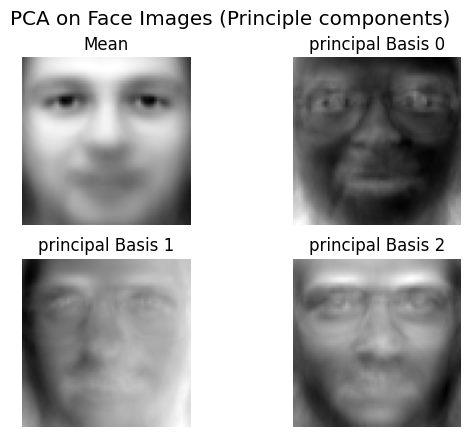

In [29]:
# Question (a): Plot the mean faces and the first principal components ("principal faces") 
# Remember to center the data and before PCA
# PS. no need to rescale


mu = np.mean(X, axis = 0) # mu = mean face. Should be 4096 x 1 (column mean, mean of each feature, mean along row)

XC = X - mu # the centered X

mod = PCA() # min(n_samples, n_features) if n_components is None
mod.fit(XC)

A = mod.components_.T #the matrix with principal components as columns. Should be 4096 x 401 = p x q = n_feature x n_components

# Recall that A has dimension p x q. 
# Here q is at most 401 because we only have 401 faces in our data.


# Given mu and A, the following code help you plot the result.
fig, axs = plt.subplots(2, 2)
fig.suptitle("PCA on Face Images (Principle components) ", fontsize="x-large")
for i in range(4):
    r, c = int(i / 2), i % 2
    if r == 0 and c == 0:
        axs[r, c].imshow(mu.reshape(h, w), cmap='gray')
        axs[r, c].axis('off')
        axs[r, c].set_title('Mean')
    else:
        axs[r, c].imshow(A.T[i - 1].reshape(h, w), cmap='gray')
        axs[r, c].axis('off')
        axs[r, c].set_title('principal Basis {}'.format(i - 1))


## (b)

Focus on compressing the last face present in our dataset. Achieve this compression by computing inner products with the principal faces. Subsequently, plot the reconstructed faces using q = 5, 20, 100, 200 principal components.

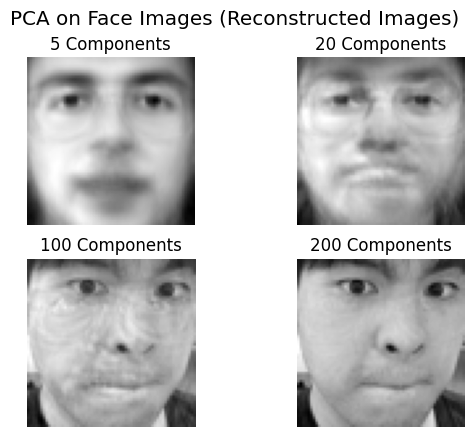

In [36]:
# Compress the last face in our data set by taking inner products with the principal components
last_face = XC[400,]  # 4096 x 1 = p x 1

# Your task: find Z, the compressed version of last_face, encoded by the principal component;
# Z should have dimension 401 x 1, each row is the inner product with the principal components 

Z = A.T @ last_face # 401 x 1  = q x 1 = q x p x p x 1


# After you find Z, the following code will help you visualize the result.
# The variable Xrecon will give you the reconstructed faces using the compressed data along with
# the principal faces and the mean face.
Ks = [5, 20, 100, 200]
fig, axs = plt.subplots(2, 2)
fig.suptitle("PCA on Face Images (Reconstructed Images) ", fontsize="x-large")
count = 0
for k in Ks:
    Xrecon = np.dot(Z[:k], A.T[:k, :]) + mu # p x 1 = 4096 x 1
    #Xrecon = A[:,:k] @ Z[:k] + mu
    r, c = int(count / 2), count % 2
    axs[r, c].imshow(Xrecon.reshape(64, 64), cmap='gray')
    axs[r, c].axis('off')
    axs[r, c].set_title('{} Components'.format(k))
    count += 1



## (c)

When employing q = 200 principal components for data compression, what percentage of storage space do we save compared to the size of the original dataset?


In [5]:
# Original Size
original_size = X.shape[0] * X.shape[1]  # 401 faces * 4096 features

# Compressed Size (using q = 200 principal components)
compressed_size = 401 * 200  # 401 face * 200 principal components

# Percentage Saved
saved = ((original_size - compressed_size) / original_size) * 100

print("Percentage Saved:", saved, "%")



Percentage Saved: 95.1171875 %


# Question 4

The dataset in focus is `survey_response_data.csv`, containing records of activities undertaken by each CEO.


The objective is to investigate the nature of the outsiders that CEOs meet. The investigation will concentrate on seven types of outsiders: `clients, suppliers, banks, investors, lawyers, politicians, and government oﬀicials`.

Start by aggregating the activity data to count how many activities each CEO has conducted with each of the seven types of outsiders. The subsequent steps will be based on this aggregated data.


In [6]:
import pandas as pd
import numpy as np

response = pd.read_csv("survey_response_data.csv")

# List of columns 
relevant_columns = ['id', 'clients', 'suppliers', 'banks', 'investors', 'lawyers', 'politicians', 'govoff']

# Create a new dataframe with only the relevant columns
response = response[relevant_columns]

response = response.groupby('id').sum()


response.head()

clients  suppliers  banks  investors  lawyers  politicians  govoff
id                                                                    
1       0.0        0.0    0.0        0.0      0.0          0.0     0.0
2       0.0       12.0    0.0        0.0      0.0          0.0     0.0
3       0.0        8.0    0.0        0.0      0.0          0.0     0.0
4       0.0        0.0    0.0        0.0      0.0          0.0     0.0
5       0.0        0.0    0.0        0.0      0.0          0.0     6.0

## (a)

Initiate every data analysis by scrutinizing the raw data. Utilize a box plot to summarize the seven marginal distributions.

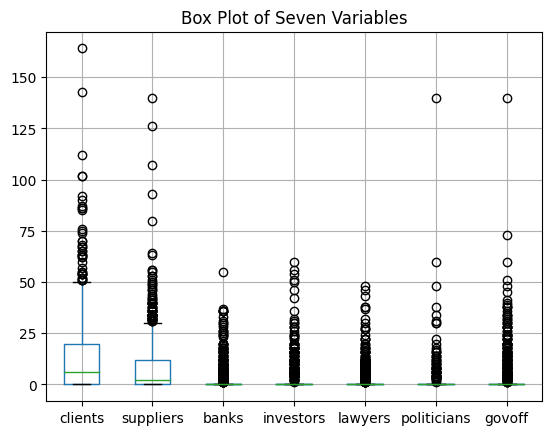

In [7]:
import matplotlib.pyplot as plt

response.boxplot()

plt.title('Box Plot of Seven Variables')

plt.show()

## (b)

Subsequent to the box plot, construct a pair plot for these seven variables. What observations can be made from the box plot and pair plot?

/Users/weishangjie/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


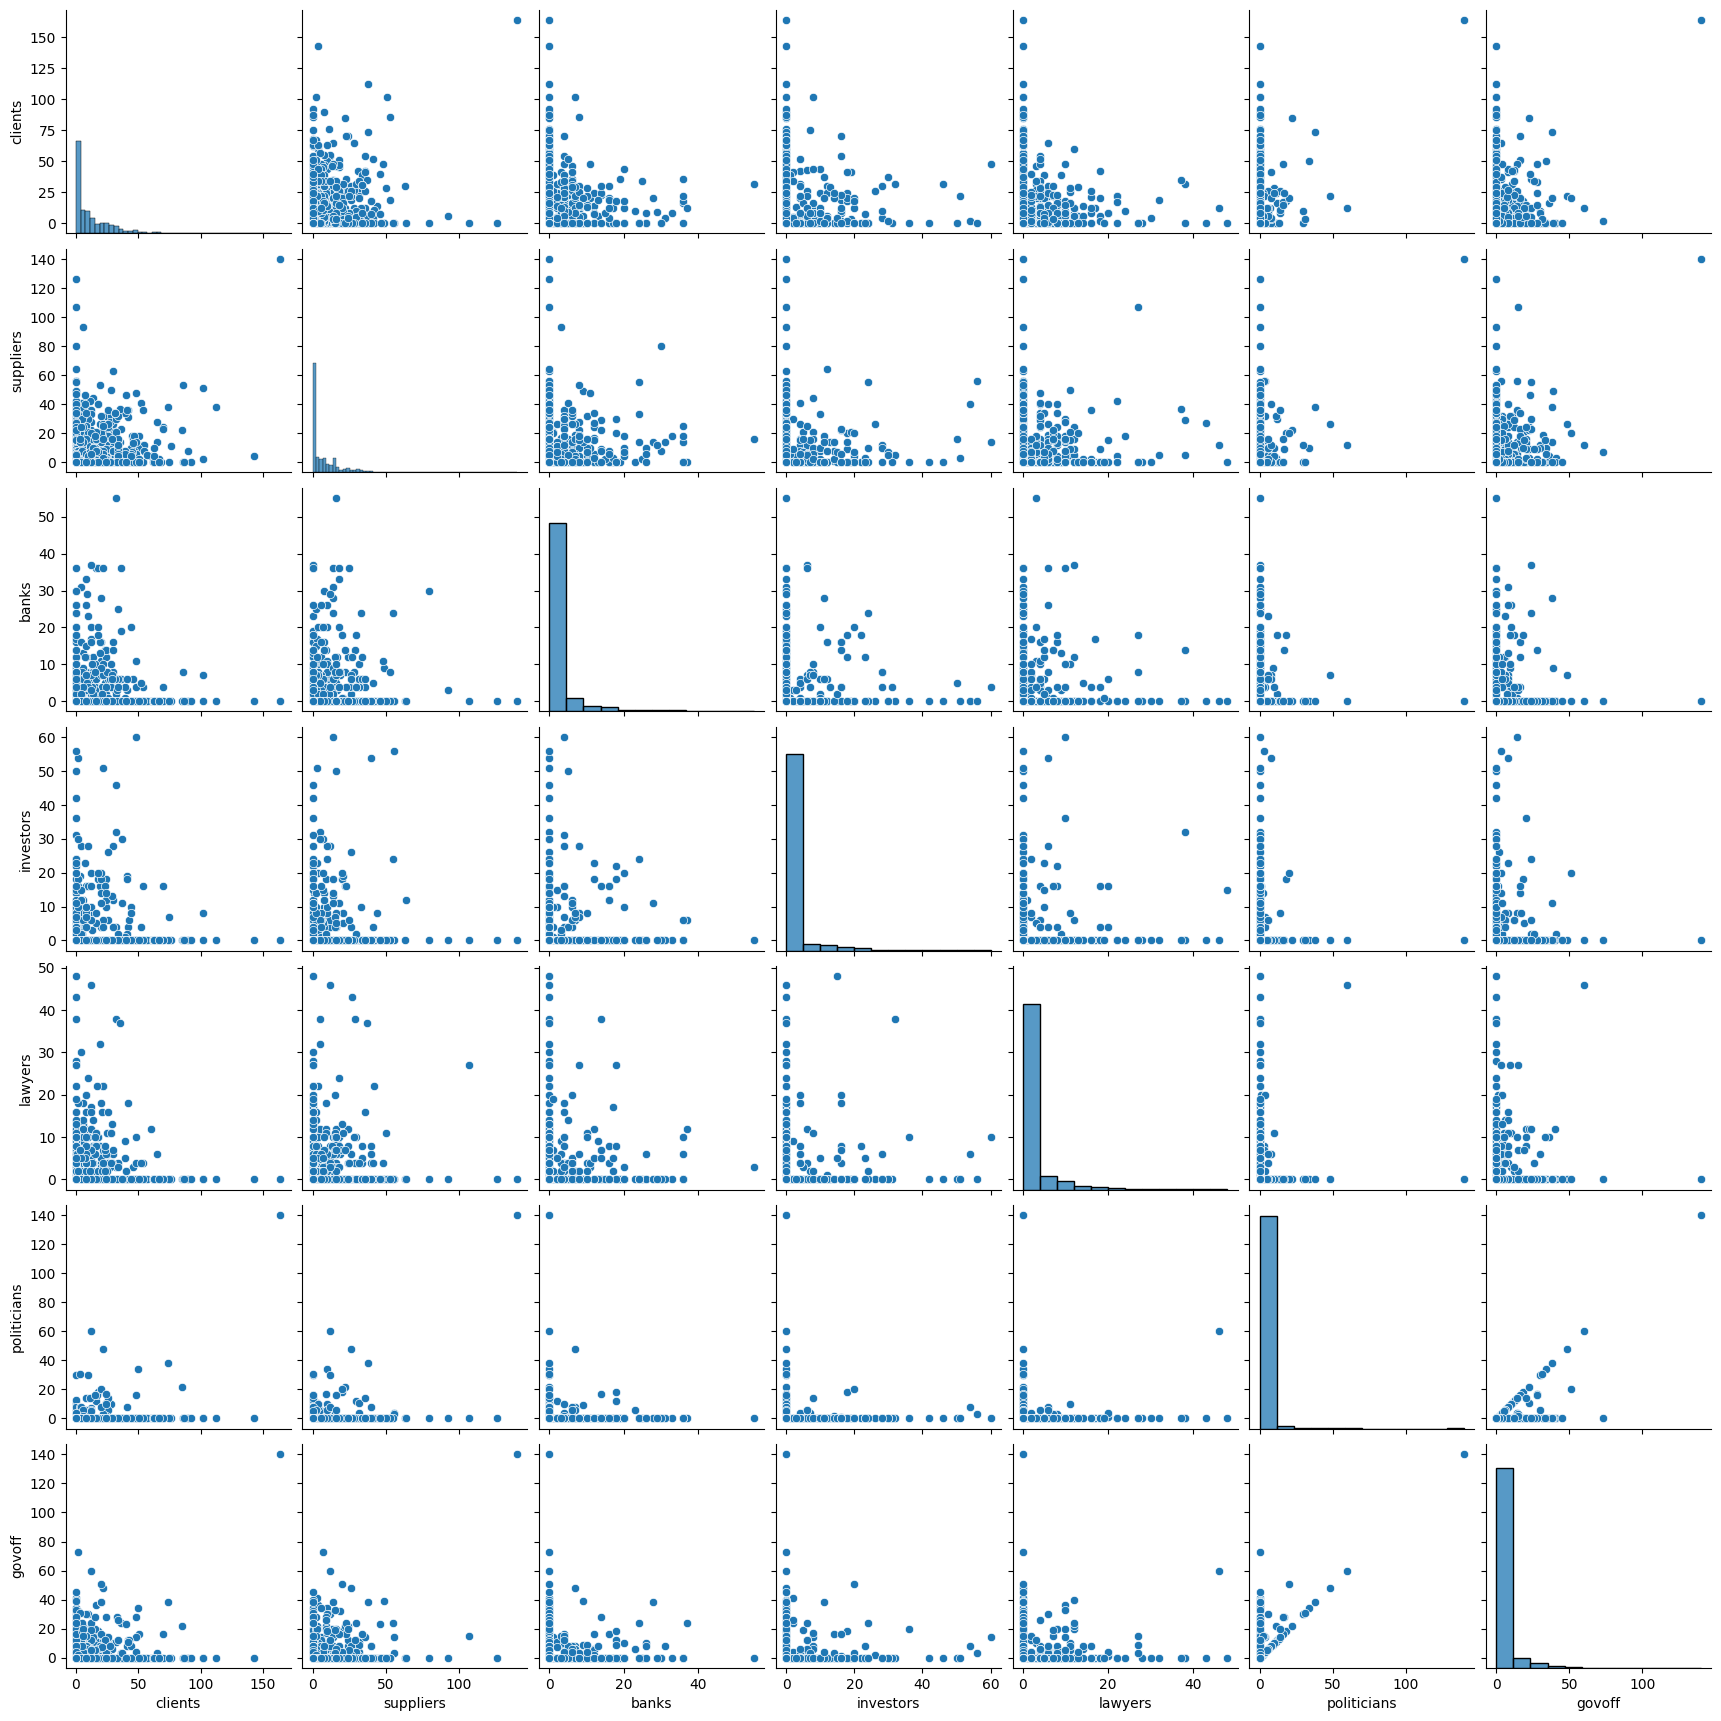

In [8]:
import seaborn as sns

sns.pairplot(response)

plt.show()

From the box plot and pair plot, we notice that each variable has an excess of zero counts (zero-inflated). Also, there's a relatively clear positive linear relationship between `politicians` and `govoff`.

## (c)

Employ a heatmap to represent the correlations between the number of activities. Identify which type exhibits the highest correlation with `politicians`.


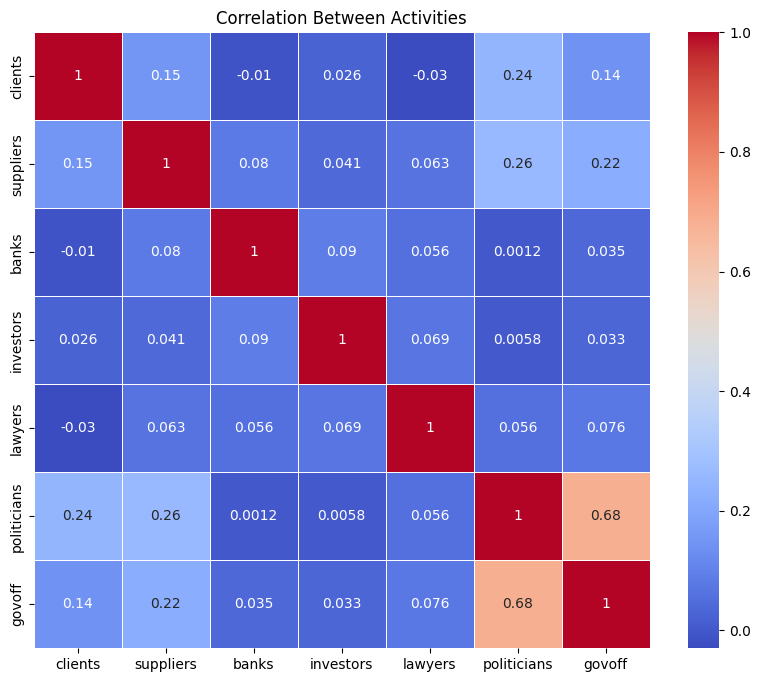

In [11]:
# Calculate the correlation matrix
corr_mtx = response.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Set the size of the heatmap
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', square=True, linewidths=0.5)


plt.title('Correlation Between Activities')


plt.show()

Clearly, `govoff` exhibits the highest correlation with `politicians`.

## (d)

Standardize the seven variables by centering around their mean and scaling by their standard deviations. Execute PCA to determine the first principal component.

- 參數:
    - `n_components`: 壓縮成幾個維度
    - `random_state`: 設定seeds
- 特徵:
    - `components_`: ndarray of shape (`n_components`, `n_features`), the components are sorted by decreasing `explained_variance_`.
    - `n_components_` :有幾個主成分
    - `explained_variance_ratio_` :每個主成分各自解釋多少資訊
    - `explained_variance_`: ndarray of shape (`n_components`,): Equal to `n_components` largest eigenvalues of the covariance matrix of X.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 標準化
std_response = StandardScaler().fit_transform(response)
std_response = pd.DataFrame(std_response, columns= relevant_columns[1:])

mod = PCA(n_components=7)
mod.fit(std_response)



# Create a new dataframe with the principal components
PCs = pd.DataFrame(data=mod.components_.T, columns=['PC_1', 'PC_2', 'PC_3', 'PC_4', 'PC_5', 'PC_6', 'PC_7'])


print(PCs)

       PC_1      PC_2      PC_3      PC_4      PC_5      PC_6      PC_7
0  0.307273 -0.179917 -0.553657  0.249009  0.500519 -0.492732  0.106615
1  0.377747  0.149110 -0.188002 -0.191178  0.441795  0.752708  0.037789
2  0.063643  0.595996 -0.273813 -0.669565 -0.107021 -0.324079 -0.031094
3  0.063818  0.568504 -0.333396  0.635721 -0.366282  0.149945 -0.028131
4  0.108723  0.492511  0.638713  0.218175  0.489639 -0.224106 -0.009327
5  0.621842 -0.139474  0.129894 -0.006583 -0.218786 -0.089013 -0.721909
6  0.596875 -0.070484  0.217177 -0.036660 -0.347947 -0.070627  0.681327


PC1=0.3073`clients`+0.3777`suppliers`+0.0636`banks`+0.0638`investors`+0.1087`lawyers`+0.6218`politicians`+0.5969`govoff`




## (e)

Plot the scree plot. How many principal components are required to explain 70% of the variation.

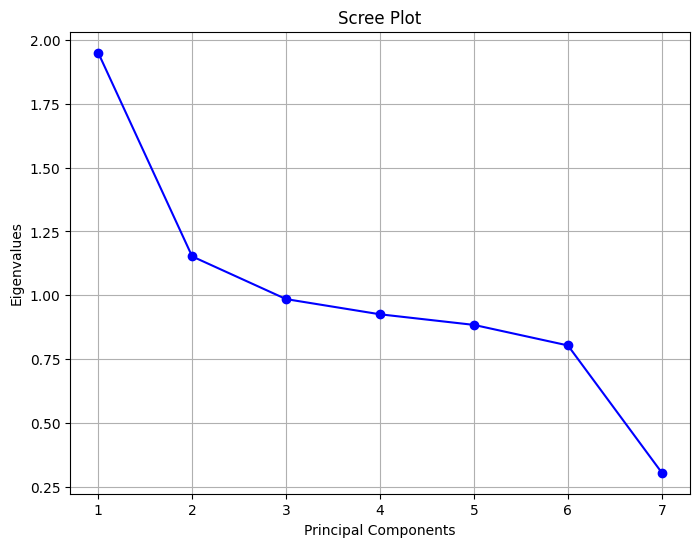

In [14]:
# Calculate eigenvalues (explained variances)
eigenvalues = mod.explained_variance_

# Plot the scree plot
plt.figure(figsize=(8, 6))
x = np.arange(1, mod.n_components_ + 1)
plt.plot(x, eigenvalues, marker='o', linestyle='-', color='b')
plt.title("Scree Plot")
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalues")
plt.grid(True)
plt.show()

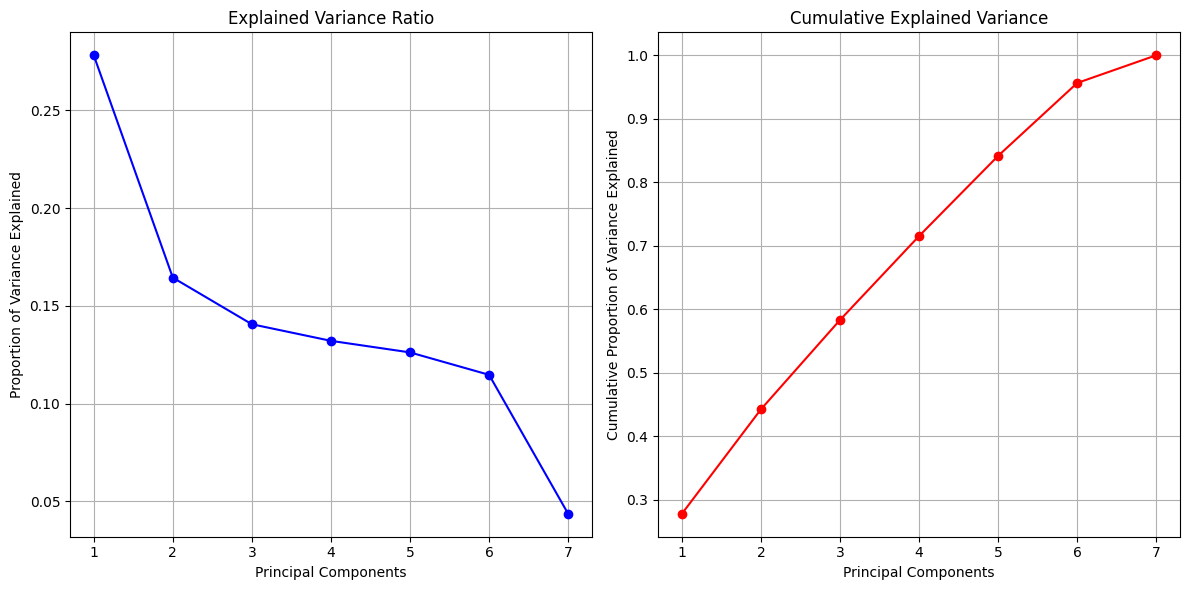

In [15]:
# Explained variance ratio
explained_var_ratio = mod.explained_variance_ratio_

# Cumulative sum of explained variance
cumulative_var_ratio = np.cumsum(explained_var_ratio)

# Plotting the explained variance ratio
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
x = np.arange(1, mod.n_components_ + 1)
plt.plot(x, explained_var_ratio, marker='o', linestyle='-', color='b')
plt.title("Explained Variance Ratio")
plt.xlabel("Principal Components")
plt.ylabel("Proportion of Variance Explained")
plt.grid(True)

# Plotting the cumulative sum of explained variance
plt.subplot(1, 2, 2)
plt.plot(x, cumulative_var_ratio, marker='o', linestyle='-', color='r')
plt.title("Cumulative Explained Variance")
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Proportion of Variance Explained")
plt.grid(True)

plt.tight_layout()
plt.show()

At least 4 components are required to explain 70\% of the variation.

## (f)

Position the first component on the x-axis and the second component on the y-axis, then plot the coeﬀicients of each variable. Provide an interpretation for the first two principal components.

- `fit_transform(X)`: Fit the model with X and apply the dimensionality reduction on X.
    - Returns: ndarray of shape (`n_samples`, `n_components`) Transformed values.

In [16]:
pca = mod.fit_transform(std_response) #各個obs在新變數(PC)下的值
pca_df = pd.DataFrame(pca)


- PCA Biplot:

    - PCA scatter plot: 顯示前兩個主成分(x,y軸)的散布情況
    - PCA loading plot: 顯示每個特性對主成分的影響程度
         - 所有特徵向量射線都從原點開始向外延伸，將觀察座標點投影在線上的值(成直角)說明了他們在該特徵變數上的量
         - 各個特徵向量之間的角度說明特徵變數之間的相關性
    
    

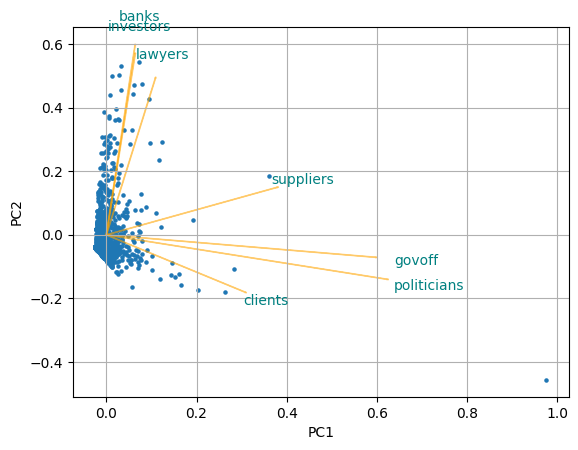

In [17]:
def biplot(score, coeff, labels=None):
    xs = score[:,0] # the first PC scores
    ys = score[:,1] # the second PC scores
    n = coeff.shape[0] # extract the number of row, which will be 7 in our example ; coeff will be a 7 x 2 mtx where each column is a PC
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = "orange", alpha= 0.5) # 用來觀察 PC1 and PC2 在7個不同變數上各自給的權重
        if labels is None:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, "Variable"+str(i+1), color = "teal", ha = "center", va = "center")
        else:
            plt.text(coeff[i, 0] * 1.15, coeff[i, 1] * 1.15, labels[i], color = "teal", ha = "center", va = "center")
    
    plt.xlabel("PC{}".format(1)) 
    plt.ylabel("PC{}".format(2)) 
    plt.grid()

    
biplot(pca[:,0:2], np.transpose(mod.components_[0:2,:]), list(std_response.columns))       
plt.show()

In [18]:
df = pd.DataFrame(np.transpose(mod.components_[0:2,:]), columns=["PC1", "PC2"])
df.index =['clients', 'suppliers', 'banks', 'investors', 'lawyers', 'politicians', 'govoff']
df

PC1       PC2
clients      0.307273 -0.179917
suppliers    0.377747  0.149110
banks        0.063643  0.595996
investors    0.063818  0.568504
lawyers      0.108723  0.492511
politicians  0.621842 -0.139474
govoff       0.596875 -0.070484

We can find that PC1 puts more weights on `politicians`, `govoff`, `suppliers`, and `clients`; while PC2 puts more weights on `investors`, `banks`, and `lawyers`.

Hence, PC1 can be interpreted as an overall measure of "political influence" and PC2 can be interpreted as an overall measure of "business communication".

# Question 5

$$(X_i,Y_i)=(0,4),(-3,1),(3,3),(3,5),(-3,3)$$

## (a) 

Perform the hierarchical clustering with average linkage. Clearly indicate
which observations are pooled in each step.

群聚間的距離定義為不同群聚間各點與各點間距離總和的平均

$\text{Step 1:}$


Distance matrix:

$$
\begin{bmatrix}
&obs_1&obs_2&obs_3&obs_4&obs_5\\
obs_1& 0 & \sqrt{18} & \sqrt{10} & \sqrt{10} & \sqrt{10} \\
obs_2& \sqrt{18} & 0 & \sqrt{40} & \sqrt{52} & 2\\
obs_3& \sqrt{10} & \sqrt{40} & 0 & 2 & 6\\
obs_4& \sqrt{10} & \sqrt{52} & 2 & 0 & \sqrt{40}\\
obs_5& \sqrt{10} & 2 & 6 & \sqrt{40} & 0
\end{bmatrix}
$$





$C_1 = \{obs_1\}$

$C_2 =  \{obs_2, obs_5\}$

$C_3 = \{obs_3, obs_4\}$

$\text{Step 2:}$

$$
\begin{bmatrix}
&C_1&C_2&C_3\\
C_1& 0 & \frac{\sqrt{18}+\sqrt{10}}{2} & \sqrt{10} \\
C_2& \frac{\sqrt{18}+\sqrt{10}}{2} & 0 & \frac{2\sqrt{40}+\sqrt{52}+6}{4} \\
C_3& \sqrt{10} & \frac{2\sqrt{40}+\sqrt{52}+6}{4} & 0 
\end{bmatrix}
$$


$C_4=\{C_1, C_3\}$

$C_5=\{C_2\}$

$\text{Step 3:}$

$C_6=\{C_4, C_5\}$

## (b)

Perform the hierarchical clustering with the complete linkage.

群聚間的距離定義為不同群聚中最遠兩點間的距離

$\text{Step 1:}$


Distance matrix:

$$
\begin{bmatrix}
&obs_1&obs_2&obs_3&obs_4&obs_5\\
obs_1& 0 & \sqrt{18} & \sqrt{10} & \sqrt{10} & \sqrt{10} \\
obs_2& \sqrt{18} & 0 & \sqrt{40} & \sqrt{52} & 2\\
obs_3& \sqrt{10} & \sqrt{40} & 0 & 2 & 6\\
obs_4& \sqrt{10} & \sqrt{52} & 2 & 0 & \sqrt{40}\\
obs_5& \sqrt{10} & 2 & 6 & \sqrt{40} & 0
\end{bmatrix}
$$


$C_1 = \{obs_1\}$

$C_2 =  \{obs_2, obs_5\}$

$C_3 = \{obs_3, obs_4\}$

$\text{Step 2:}$


$$
\begin{bmatrix}
&C_1&C_2&C_3\\
C_1& 0 & \sqrt{18} & \sqrt{10} \\
C_2& \sqrt{18} & 0 & \sqrt{52} \\
C_3& \sqrt{10} & \sqrt{52} & 0 
\end{bmatrix}
$$

$C_4=\{C_1, C_3\}$

$C_5=\{C_2\}$

$\text{Step 3:}$

$C_6=\{C_4, C_5\}$